# Name- Yugandhar Kumar Savalam                        Student Id- C0805999

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/yugan/OneDrive/Desktop/AI/Facebook_Prophet.csv")

In [3]:
df['published'] = pd.to_datetime(df['published'])
df

,published,domain
0,2012-08-13 22:54:53.510000+00:00,medium.com
1,2012-08-13 22:57:17.248000+00:00,medium.com
2,2016-11-04 23:40:43.364000+00:00,medium.com
3,2016-12-24 18:21:13.427000+00:00,medium.com
4,2015-09-22 21:37:48.207000+00:00,blog.medium.com
...,...,...
5649,2016-02-11 14:01:00.931000+00:00,medium.com
5650,2016-08-17 19:39:42.066000+00:00,medium.com
5651,2015-12-18 22:36:46.220000+00:00,medium.com
5652,2015-12-30 15:40:37.437000+00:00,medium.com


In [4]:
df.shape

(5654, 2)

In [5]:
data = pd.DataFrame()
data['published_date'] = df['published']
data['search_link'] = df['domain']

data.head()

,published_date,search_link
0,2012-08-13 22:54:53.510000+00:00,medium.com
1,2012-08-13 22:57:17.248000+00:00,medium.com
2,2016-11-04 23:40:43.364000+00:00,medium.com
3,2016-12-24 18:21:13.427000+00:00,medium.com
4,2015-09-22 21:37:48.207000+00:00,blog.medium.com


In [6]:
data['search_link'] = "medium.com"
data['published_date'] = pd.to_datetime(data['published_date'])

In [7]:
uniqueValues = (data['search_link']).unique()
print(uniqueValues)

['medium.com']


In [8]:
fd = data.sort_values(by='published_date',ascending=True)
fd.head(n=10)

,published_date,search_link
2026,2008-06-26 00:00:00+00:00,medium.com
964,2010-08-10 13:46:14+00:00,medium.com
2025,2011-08-23 20:14:26+00:00,medium.com
1934,2011-09-29 00:00:00+00:00,medium.com
2022,2011-10-24 00:00:00+00:00,medium.com
713,2011-11-09 00:00:00+00:00,medium.com
2604,2011-11-30 02:17:27+00:00,medium.com
4955,2012-01-13 10:28:28+00:00,medium.com
3136,2012-07-31 06:33:36+00:00,medium.com
4609,2012-08-07 17:04:37.186000+00:00,medium.com


In [9]:
aggr_df = fd.groupby('published_date')[['search_link']].count()
aggr_df.columns = ['Total_Posts']
aggr_df.head(n=10)

,Total_Posts
published_date,
2008-06-26 00:00:00+00:00,1
2010-08-10 13:46:14+00:00,1
2011-08-23 20:14:26+00:00,1
2011-09-29 00:00:00+00:00,1
2011-10-24 00:00:00+00:00,1
2011-11-09 00:00:00+00:00,1
2011-11-30 02:17:27+00:00,1
2012-01-13 10:28:28+00:00,1
2012-07-31 06:33:36+00:00,1


In [10]:
monthly_posts = aggr_df.resample('M').apply(sum)
monthly_posts.tail(n=10)

,Total_Posts
published_date,
2016-03-31 00:00:00+00:00,315
2016-04-30 00:00:00+00:00,227
2016-05-31 00:00:00+00:00,290
2016-06-30 00:00:00+00:00,349
2016-07-31 00:00:00+00:00,337
2016-08-31 00:00:00+00:00,403
2016-09-30 00:00:00+00:00,406
2016-10-31 00:00:00+00:00,453
2016-11-30 00:00:00+00:00,491


In [11]:
weekly_posts = aggr_df.resample('W').apply(sum)
weekly_posts.tail(n=5)

,Total_Posts
published_date,
2016-12-04 00:00:00+00:00,116
2016-12-11 00:00:00+00:00,118
2016-12-18 00:00:00+00:00,106
2016-12-25 00:00:00+00:00,123
2017-01-01 00:00:00+00:00,117


In [12]:
daily_posts = aggr_df.resample('D').apply(sum)
daily_posts.tail(n=5)

,Total_Posts
published_date,
2016-12-27 00:00:00+00:00,19
2016-12-28 00:00:00+00:00,18
2016-12-29 00:00:00+00:00,20
2016-12-30 00:00:00+00:00,18
2016-12-31 00:00:00+00:00,24


In [ ]:
from plotly.offline import init_notebook_mode, iplot
from plotly import graph_objs as go

init_notebook_mode(connected=True)

In [42]:
def plotly_posts(fd, title=""):
    common_posts = dict(x=fd.index,  mode='lines')
    data = [go.Scatter(y=fd[c], name=c, **common_posts) for c in fd.columns]
    layout =dict(title=title)
    fig = dict(data =data, layout=layout)
    iplot(fig,show_link=False)

In [44]:
plotly_posts(weekly_posts,title="Posts(Weekly)")

# Making a Forcast using Facebook Prophet

In [13]:
from fbprophet import Prophet
import logging 
logging.getLogger().setLevel(logging.ERROR)

post = weekly_posts.reset_index()
post.columns=['ds','y']

# transform timezone into date format
post['ds'] = post['ds'].dt.tz_convert(None)
post.tail()

,ds,y
440,2016-12-04,116
441,2016-12-11,118
442,2016-12-18,106
443,2016-12-25,123
444,2017-01-01,117


In [14]:
prediction_size = 30
train_df = post[:-prediction_size]
train_df.tail()

,ds,y
410,2016-05-08,61
411,2016-05-15,70
412,2016-05-22,74
413,2016-05-29,62
414,2016-06-05,69


In [15]:
model = Prophet()
model.fit(train_df);

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
future_posts = model.make_future_dataframe(periods = prediction_size)
future_posts.tail()

,ds
440,2016-07-01
441,2016-07-02
442,2016-07-03
443,2016-07-04
444,2016-07-05


In [17]:
forecast = model.predict(future_posts)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
440,2016-07-01,63.638974,57.506399,68.894619,63.638974,63.638974,-0.665639,-0.665639,-0.665639,-0.665639,-0.665639,-0.665639,0.0,0.0,0.0,62.973335
441,2016-07-02,63.742293,57.941599,68.732321,63.742293,63.742294,-0.635293,-0.635293,-0.635293,-0.635293,-0.635293,-0.635293,0.0,0.0,0.0,63.107000
442,2016-07-03,63.845612,57.824118,68.681604,63.845612,63.846283,-0.609229,-0.609229,-0.609229,-0.609229,-0.609229,-0.609229,0.0,0.0,0.0,63.236383
443,2016-07-04,63.948931,58.034601,69.230253,63.948931,63.949739,-0.587949,-0.587949,-0.587949,-0.587949,-0.587949,-0.587949,0.0,0.0,0.0,63.360982
444,2016-07-05,64.052250,58.042901,68.933697,64.052250,64.053511,-0.571861,-0.571861,-0.571861,-0.571861,-0.571861,-0.571861,0.0,0.0,0.0,63.480389


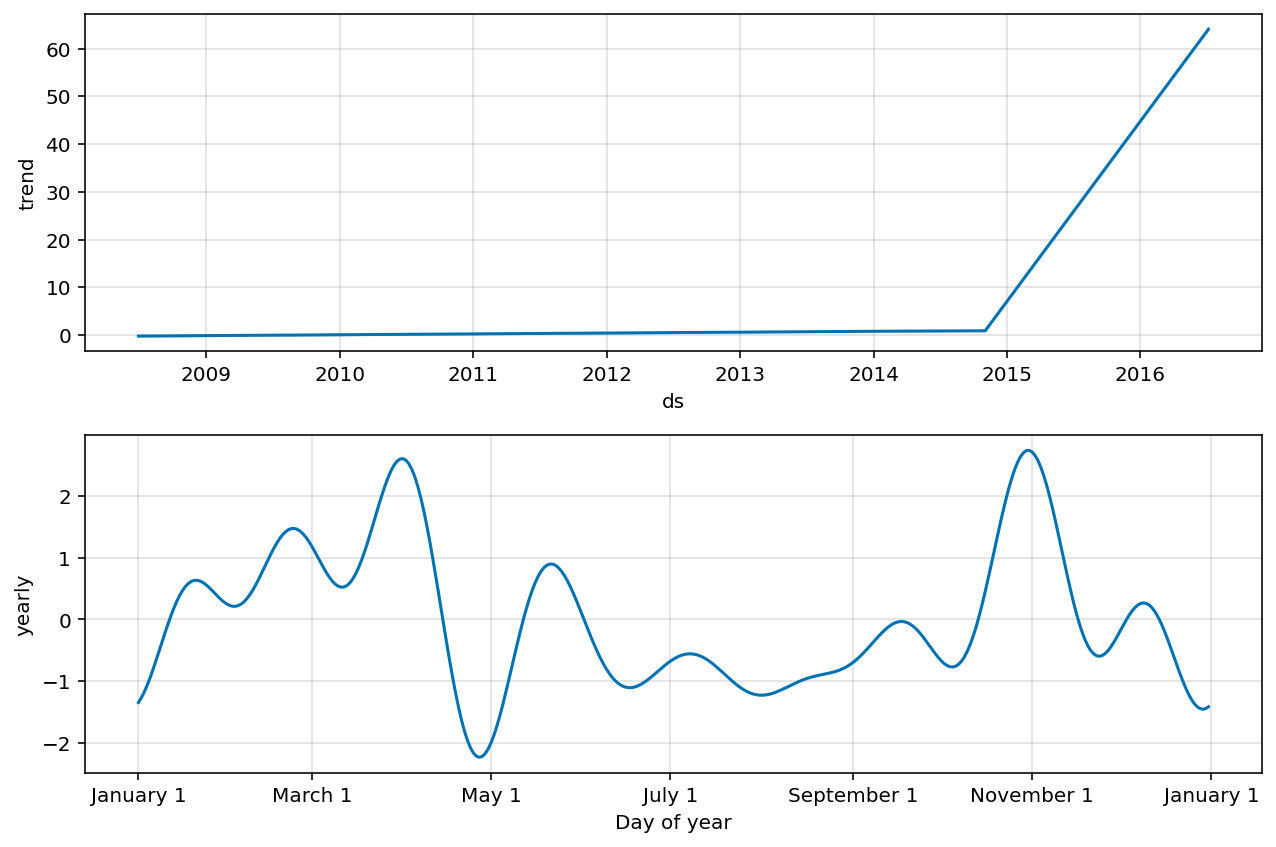

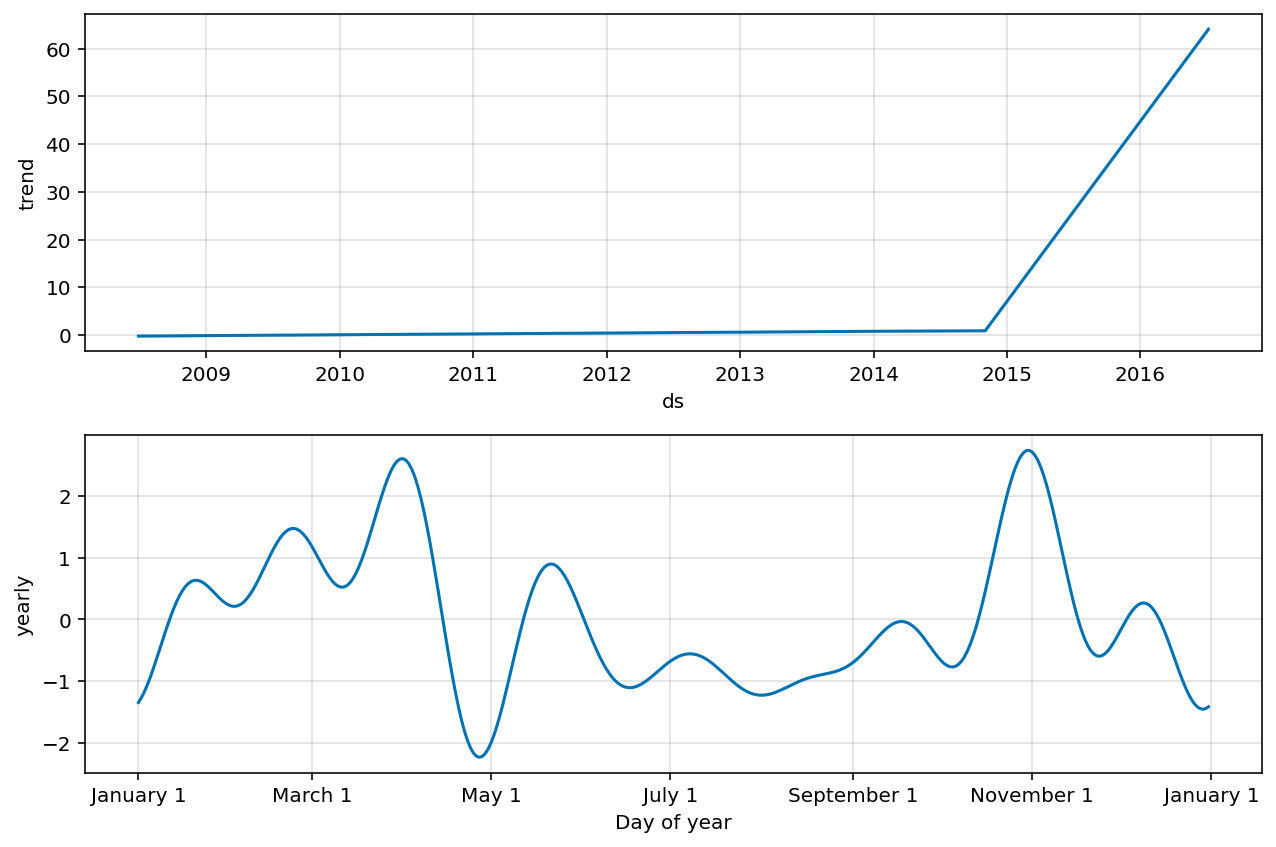

In [18]:
model.plot_components(forecast)

# Forecast Performance Evaluation

In [19]:
print(', '.join(forecast.columns))

ds, trend, yhat_lower, yhat_upper, trend_lower, trend_upper, additive_terms, additive_terms_lower, additive_terms_upper, yearly, yearly_lower, yearly_upper, multiplicative_terms, multiplicative_terms_lower, multiplicative_terms_upper, yhat


In [20]:
def comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']].join(historical.set_index('ds'))

comp_posts = comparison_dataframe(post, forecast)
comp_posts.tail()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2016-07-01,62.973335,57.506399,68.894619,NaN
2016-07-02,63.107000,57.941599,68.732321,NaN
2016-07-03,63.236383,57.824118,68.681604,80.0
2016-07-04,63.360982,58.034601,69.230253,NaN
2016-07-05,63.480389,58.042901,68.933697,NaN


In [21]:
def calculate_forecast_errors(post,prediction_size):
    post = post.copy()
    
    post['e'] = post['y'] - post['yhat']
    post['p'] = 100* post['e']/post['y']
    
    predicted_part = post[-prediction_size:]
    
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    return {'MPAE:': error_mean('p'), 'MAE:':error_mean('e')}

In [22]:
for err_name, err_value in calculate_forecast_errors(comp_posts, prediction_size).items():
    print(err_name, err_value)

MPAE: 22.016504551704525
MAE: 19.126442404092483


# Forecast Data Visulaization

In [27]:
from plotly.offline import init_notebook_mode, iplot
from plotly import graph_objs as go

init_notebook_mode(connected=True)

In [26]:
def display_forecast(comp_posts, num_predictions, num_values, title):
    def create_go(name, column, num, **kwargs):
        points = comp_posts.tail(num)
        args = dict(name = name, x=points.index, y=points[column], mode='lines')
        args.update(kwargs)
        return go.Scatter(**args)
    
    lower_bound = create_go('Lower Bound', 'yhat_lower', num_predictions, line=dict(width=0),marker=dict(color='green'))
    upper_bound = create_go('Upper Bound', 'yhat_upper', num_predictions, line=dict(width=0),marker=dict(color='green'), fillcolor='rgb(0,0,0)',fill='tonexty')
    
    forecast = create_go('Forecast', 'yhat', num_predictions, line=dict(color='red'))
    actual = create_go('Actual','y',num_values,marker=dict(color='green'))
    data = [lower_bound,upper_bound, forecast, actual]
    
    layout = go.Layout(yaxis=dict(title="Posts"), title = title, showlegend = False)
    fig = go.Figure(data =data, layout=layout)
    iplot(fig, show_link=False)

display_forecast(comp_posts,prediction_size, 100, 'New Posts on medim site')